In [5]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Source from Data School Youtube channel

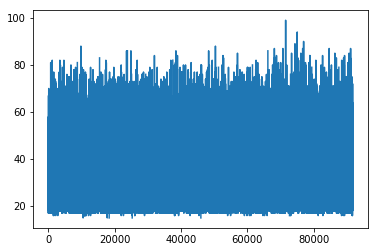

In [6]:
df1=pd.read_csv('police.csv')
df2=pd.read_csv('ted.csv')
df1.driver_age.plot()

In [7]:
df1.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [8]:
df1.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

# Remove column contain missing values 

In [9]:
df1.shape

(91741, 15)

In [12]:
df1.drop('county_name',axis=1,inplace=True)

KeyError: "['county_name'] not found in axis"

In [10]:
df1.shape

(91741, 15)

In [13]:
df1.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [14]:
df1.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [15]:
df1.dropna('columns',how='all').shape

(91741, 14)

# Comparing Groups

# do man or women speed more often
driver_gender , violation


In [17]:
df1[['driver_gender','violation']].head(10)

,driver_gender,violation
0,M,Speeding
1,M,Speeding
2,M,Speeding
3,M,Other
4,F,Speeding
5,M,Equipment
6,M,Speeding
7,F,Speeding
8,M,Speeding
9,M,Speeding


In [18]:
df1[df1.violation=='Speeding'][['driver_gender']]

,driver_gender
0,M
1,M
2,M
4,F
6,M
7,F
8,M
9,M
10,M
11,F


In [21]:
  df1[(df1.violation=='Speeding') &  (df1.driver_gender=='M')][['violation','driver_gender']]

,violation,driver_gender
0,Speeding,M
1,Speeding,M
2,Speeding,M
6,Speeding,M
8,Speeding,M
9,Speeding,M
10,Speeding,M
12,Speeding,M
14,Speeding,M
15,Speeding,M


In [31]:
mData=df1[(df1.violation=='Speeding') &  (df1.driver_gender=='M')][['violation','driver_gender']].count()
mData

violation        32979
driver_gender    32979
dtype: int64

In [28]:
  fData=df1[(df1.violation=='Speeding') &  (df1.driver_gender=='F')][['violation','driver_gender']].count()

In [29]:
fData

violation        15482
driver_gender    15482
dtype: int64

In [32]:
mData>fData

violation        True
driver_gender    True
dtype: bool

In [71]:
df1[(df1.violation=='Speeding')].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [44]:
df1[(df1.driver_gender=='M')].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [69]:
df1[(df1.driver_gender=='F')].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [65]:
df1.groupby('driver_gender').violation.value_counts(normalize=True).loc[:,'Speeding']

driver_gender
F    0.65850
M    0.52435
Name: violation, dtype: float64

In [63]:
df1.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

In [61]:
df1.groupby('driver_gender').violation.value_counts(normalize=True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


In [55]:
df1.groupby('driver_gender').count()

,stop_date,stop_time,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
driver_gender,,,,,,,,,,,,,
F,23511,23511,23510,23464,23511,23511,23511,23511,471,23511,23511,23511,23511
M,62895,62895,62895,62649,62895,62895,62895,62895,2725,62895,62895,62895,62895


# Examing Relationship

# ## Does gender affect who gets search during stop 
driver_gender,search_conducted

In [72]:
df1[['driver_gender','search_conducted']] 

,driver_gender,search_conducted
0,M,False
1,M,False
2,M,False
3,M,False
4,F,False
5,M,False
6,M,False
7,F,False
8,M,False
9,M,False


In [211]:
df1.search_conducted.value_counts(normalize=True)

False    0.965141
True     0.034837
NAN      0.000022
Name: search_conducted, dtype: float64

In [77]:
## for finding percentage of trues or 1s
df1.search_conducted.mean()

0.03483720473942948

In [82]:
df1.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [80]:
df1.groupby(['violation','driver_gender']).search_conducted.mean().unstack()

driver_gender,F,M
violation,,
Equipment,0.042622,0.070081
Moving violation,0.036205,0.059831
Other,0.056522,0.047146
Registration/plates,0.066140,0.110376
Seat belt,0.012598,0.037980
Speeding,0.008720,0.024925


# handling missing values 

# Why is Search_type value is Missing ??

In [87]:
df1.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [98]:
df1[['search_type']]

,search_type
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [92]:
df1.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonable Suspicion                         11
Incident to Arrest,Invent

In [94]:
df1[df1.search_conducted==False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

In [95]:
df1.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Incident to Arrest,Protective Frisk                            33
Probable Cause,Protective Frisk                                33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Incident to Arrest,Inventory,Protective Frisk                  11
Protective

In [99]:
df1.search_type.unique()

array([nan, 'Incident to Arrest,Protective Frisk', 'Probable Cause',
       'Incident to Arrest', 'Probable Cause,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Probable Cause',
       'Incident to Arrest,Inventory',
       'Incident to Arrest,Probable Cause', 'Protective Frisk',
       'Reasonable Suspicion', 'Inventory', 'Inventory,Protective Frisk',
       'Incident to Arrest,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Protective Frisk',
       'Probable Cause,Protective Frisk',
       'Incident to Arrest,Inventory,Protective Frisk',
       'Protective Frisk,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Reasonable Suspicion',
       'Inventory,Probable Cause',
       'Incident to Arrest,Protective Frisk,Reasonable Suspicion',
       'Inventory,Probable Cause,Protective Frisk',
       'Inventory,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Reasonable Suspicion',
       'Inventory,Probable Cause,Reasonable Suspicion',

# During Search how often the driver is frisked ?

In [121]:
df1['frisk']=df1.search_type.str.contains('Protective Frisk')

In [122]:
df1['frisk'].value_counts()

False    2922
True      274
Name: frisk, dtype: int64

In [123]:
df1['frisk'].value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [124]:
df1['frisk'].sum()

274

In [125]:
df1['frisk'].mean()

0.08573216520650813

# whick year has the least number of stops

In [126]:
df1.head(10)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
5,2005-03-23,09:45,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,NaN
6,2005-04-01,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
7,2005-06-06,13:20,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
8,2005-07-13,10:15,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
9,2005-07-13,15:45,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN


In [139]:
df1.stop_date.str.slice(0,4).value_counts().sort_values()

2005     2558
2010     7561
2009     7908
2013     7924
2011     8126
2015     8599
2008     8752
2014     9228
2007     9476
2006    10639
2012    10970
Name: stop_date, dtype: int64

In [142]:
combined=df1.stop_date.str. cat(df1.stop_time,sep=' ')

In [143]:
combined

0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
5        2005-03-23 09:45
6        2005-04-01 17:30
7        2005-06-06 13:20
8        2005-07-13 10:15
9        2005-07-13 15:45
10       2005-07-13 16:20
11       2005-07-13 19:00
12       2005-07-14 19:55
13       2005-07-18 19:30
14       2005-07-18 19:45
15       2005-07-19 00:30
16       2005-07-19 00:30
17       2005-07-19 23:30
18       2005-07-20 00:05
19       2005-07-24 20:10
20       2005-07-28 12:37
21       2005-08-07 16:50
22       2005-08-08 02:09
23       2005-08-18 10:57
24       2005-08-28 01:00
25       2005-09-03 16:02
26       2005-09-17 10:54
27       2005-09-21 13:30
28       2005-09-22 22:34
29       2005-09-26 01:05
               ...       
91711    2015-12-30 15:42
91712    2015-12-30 16:19
91713    2015-12-30 17:07
91714    2015-12-30 17:39
91715    2015-12-30 23:26
91716    2015-12-30 23:33
91717    2015-12-31 00:00
91718    201

In [145]:
df1['date_time']=pd.to_datetime(combined)

In [151]:
df1.date_time.dt.year

0        2005
1        2005
2        2005
3        2005
4        2005
5        2005
6        2005
7        2005
8        2005
9        2005
10       2005
11       2005
12       2005
13       2005
14       2005
15       2005
16       2005
17       2005
18       2005
19       2005
20       2005
21       2005
22       2005
23       2005
24       2005
25       2005
26       2005
27       2005
28       2005
29       2005
         ... 
91711    2015
91712    2015
91713    2015
91714    2015
91715    2015
91716    2015
91717    2015
91718    2015
91719    2015
91720    2015
91721    2015
91722    2015
91723    2015
91724    2015
91725    2015
91726    2015
91727    2015
91728    2015
91729    2015
91730    2015
91731    2015
91732    2015
91733    2015
91734    2015
91735    2015
91736    2015
91737    2015
91738    2015
91739    2015
91740    2015
Name: date_time, Length: 91741, dtype: int64

In [149]:
df1.date_time.dt.weekday

0        6
1        1
2        6
3        6
4        0
5        2
6        4
7        0
8        2
9        2
10       2
11       2
12       3
13       0
14       0
15       1
16       1
17       1
18       2
19       6
20       3
21       6
22       0
23       3
24       6
25       5
26       5
27       2
28       3
29       0
        ..
91711    2
91712    2
91713    2
91714    2
91715    2
91716    2
91717    3
91718    3
91719    3
91720    3
91721    3
91722    3
91723    3
91724    3
91725    3
91726    3
91727    3
91728    3
91729    3
91730    3
91731    3
91732    3
91733    3
91734    3
91735    3
91736    3
91737    3
91738    3
91739    3
91740    3
Name: date_time, Length: 91741, dtype: int64

In [153]:
df1.date_time.dt.year.value_counts().sort_values()

2005     2558
2010     7561
2009     7908
2013     7924
2011     8126
2015     8599
2008     8752
2014     9228
2007     9476
2006    10639
2012    10970
Name: date_time, dtype: int64

In [154]:
df1.date_time.dt.year.value_counts().sort_values().index[0]

2005

# how does drug activity change by time
## stop_dateime,drug_related_stop

In [164]:
df1.drugs_related_stop.value_counts(normalize=True)

False    0.991116
True     0.008884
Name: drugs_related_stop, dtype: float64

In [165]:
df1.drugs_related_stop.mean()

0.008883705213590434

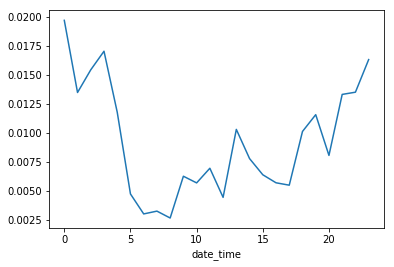

In [182]:
df1.groupby(df1.date_time.dt.hour).drugs_related_stop.mean().plot()

# DO most stop occurs at night

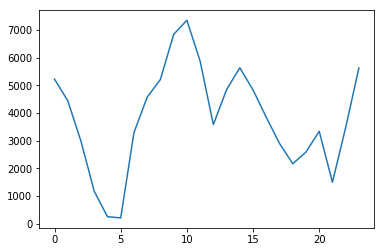

In [187]:
df1.date_time.dt.hour.value_counts().sort_index().plot()

# Find the bad data in Stop_duration column and fix it

In [202]:
df1.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [205]:
df1[(df1.stop_duration=='1') | (df1.stop_duration=='2')]='NAN'
df1.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
NAN              2
Name: stop_duration, dtype: int64

In [ ]:
df1.loc[(df1.stop_duration=='1') | (df1.stop_duration=='2'),'stop_duration']=np.nanb

In [209]:
df1.loc[df1.stop_duration=='NAN','stop_duration']=np.nan
df1.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64